In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import seq2seq_model
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow import keras



2023-05-07 16:52:34.250019: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-07 16:52:34.252251: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 16:52:34.295937: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 16:52:34.296833: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 16:52:36.073195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = pd.read_csv('Data/Train/2249345v4423910.csv', index_col=0)
df

,ltp odds,r1 spread,r1 pup,r2 spread,r2 pup,enhanced_markov,r1_0,r1_1,r1_2,r1_3,r2_0,r2_1,r2_2,r2_3
2018-07-07 10:36:10,0.424641,0.093909,0.409607,0.019749,0.484152,0.883068,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:15,0.424423,0.093909,0.409607,0.019749,0.484152,0.883068,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:20,0.424206,0.093909,0.409607,0.019749,0.484152,0.883068,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:25,0.423989,0.093909,0.409607,0.019749,0.484152,0.883068,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:30,0.423772,0.093909,0.409607,0.019749,0.484152,0.883068,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-07 13:42:02,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-07 13:42:05,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-07 13:42:07,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-07 13:42:10,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
data = df.to_numpy()
data

array([[0.4246405 , 0.09390895, 0.40960749, ..., 0.        , 0.        ,
        1.        ],
       [0.42442341, 0.09390895, 0.40960749, ..., 0.        , 0.        ,
        1.        ],
       [0.42420631, 0.09390895, 0.40960749, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.00896503, 0.73754648, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.00896503, 0.73754648, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.00896503, 0.73754648, ..., 0.        , 1.        ,
        0.        ]])

In [4]:
train, test = train_test_split(data, test_size=0.4, shuffle=False)
train_x, train_y = seq2seq_model.truncate_data(data, 60 * 3, 60)
# train = data[: 60 * 8, :]
# test = data[60 * 8 :, :]
print(test.shape, train.shape)
print(train_x[2,:,0])
print(train_y[2,:,0])

(923, 14) (1383, 14)
[0.42420631 0.42398921 0.42377212 0.42355502 0.42333792 0.42312082
 0.42297754 0.42297754 0.42297754 0.42297754 0.42297754 0.42297754
 0.42297754 0.42297754 0.42297754 0.42297754 0.42297754 0.42297754
 0.42297754 0.42297754 0.42297754 0.42297754 0.42297754 0.42297754
 0.42297754 0.42274284 0.42232372 0.42190461 0.42148549 0.42106638
 0.42064726 0.42022815 0.41980904 0.41955757 0.41955757 0.41955757
 0.41955757 0.41955757 0.41955757 0.41974592 0.41999376 0.4202416
 0.42048943 0.42073727 0.42098511 0.42123294 0.42123419 0.4209933
 0.4207524  0.42051151 0.42027061 0.42002972 0.41978883 0.41956125
 0.41965338 0.41974552 0.41983765 0.41992978 0.42002192 0.42011405
 0.42020618 0.42029832 0.42039045 0.42048258 0.42057471 0.42066685
 0.42075898 0.42085111 0.42094325 0.42103538 0.42112751 0.42121964
 0.42131178 0.42140391 0.42149604 0.42158818 0.42168031 0.42177244
 0.42186457 0.42195671 0.42204884 0.42214097 0.42223311 0.42232524
 0.42241737 0.4225095  0.42260164 0.4226937

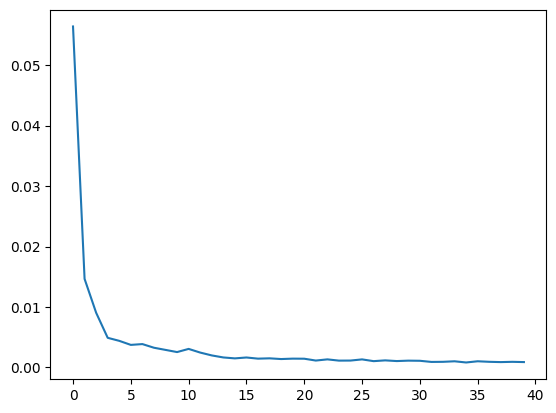

In [5]:
hist = pd.read_csv('train_hist.csv')
plt.plot(hist['mse'])

In [6]:
model = load_model("lstm_model")
model.summary()

2023-05-07 16:52:40.000473: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-07 16:52:40.417869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-05-07 16:52:40.417998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMEN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75, 200)           172000    
                                                                 
 lstm_1 (LSTM)               (None, 300)               601200    
                                                                 
 dense (Dense)               (None, 50)                15050     
                                                                 
 dense_1 (Dense)             (None, 14)                714       
                                                                 
Total params: 788,964
Trainable params: 788,964
Non-trainable params: 0


2023-05-07 16:52:42.267058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-07 16:52:42.268649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-07 16:52:42.269633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

_________________________________________________________________


In [11]:
# score, scores, actual, predicted = seq2seq_model.evaluate_model(model, train, test, 3, 36, features_out=range(1), features=range(1), features_in_num=1, features_out_num=1, initial_epochs=30, epochs=2, batches_to_train=100000)
window = 75
test_x, test_y = seq2seq_model.truncate_single_step(test, window, features_in=range(14), features_out=range(14))
print(test_x.shape, test_y.shape)
results = model.evaluate(test_x, test_y)
preds = model.predict(test_x)

(848, 75, 14) (848, 14)
27/27 [==============================] - 2s 66ms/step


RMSE:  0.03048422134818709
MAE:  0.009700038470327854


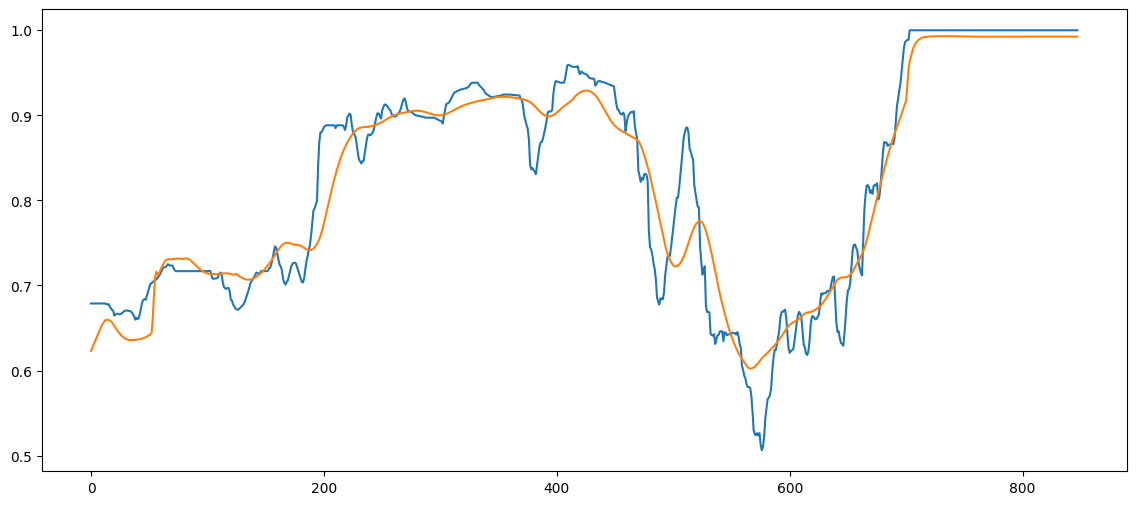

In [12]:
plt.figure(figsize=(14,6))
plt.plot(test_y[:,0])
plt.plot(preds[:,0])
print('RMSE: ', np.sqrt(results[0]))
print('MAE: ', results[1])

In [22]:
forecasts = []
i = 0
forecast_window = 36
while i * forecast_window < test_x.shape[0]:
    pred_x = test_x[forecast_window * i, :, :]
    pred_x = pred_x.reshape((1, window, pred_x.shape[1]))
    y_future = []
    for k in range(forecast_window):
        pred_y = model.predict(pred_x)
        y_future.append(pred_y)
        pred_x = np.append(pred_x[:, 1:, :], pred_y.reshape(1, 1, 14), axis=1)
    forecasts.append(y_future)
    i += 1
    

1/1 [==============================] - 0s 65ms/step


RMSE:  0.0009292877512052655
MAE:  0.009700038470327854
(24, 36, 1, 14)
(864,)
     Predictions
0            NaN
1       0.623062
2       0.625755
3       0.628246
4       0.630542
..           ...
859     0.992512
860     0.992512
861     0.992512
862     0.992512
863     0.992512

[864 rows x 1 columns]


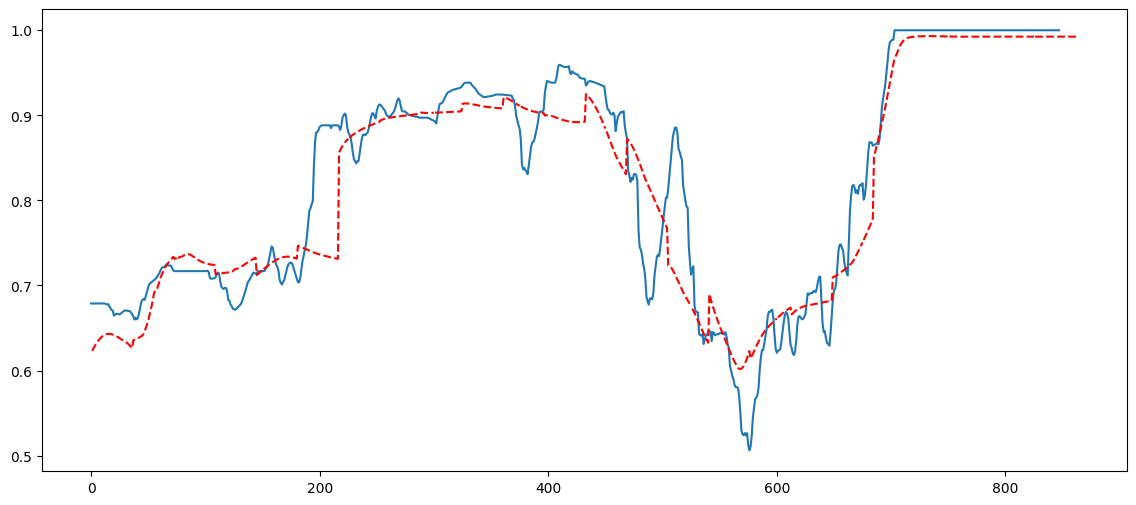

In [21]:
print('RMSE: ', results[0])
print('MAE: ', results[1])
forecasts_arr = np.array(forecasts)
forecasts_flat = forecasts_arr[:, :, 0, 0].flatten()
print(forecasts_arr.shape)
print(forecasts_flat.shape)
df_preds = pd.DataFrame({'Predictions': forecasts_flat}).shift(1)
print(df_preds)
plt.figure(figsize=(14,6))
plt.plot(test_y[:,0])
i = 0
idx = 0

while idx + forecast_window <= test_x.shape[0]:
     idx = forecast_window * i + 1
     s_pred = df_preds.iloc[idx:idx + forecast_window]
     plt.plot(s_pred, '--', color='red')
     i += 1

In [20]:
pred_length = test_y.shape[0]
df_scores = pd.DataFrame({'Forecasts': df_preds['Predictions'].iloc[1:pred_length], 'Actual': test_y[1:,0]})
df_scores['forecast absolute error'] = abs(df_scores['Actual'] - df_scores['Forecasts'])

In [ ]:
# print('RMSE: ', score)
# actual_odds = actual.reshape((actual.shape[0]*actual.shape[1]))
# predicted_odds = predicted.reshape((predicted.shape[0]*predicted.shape[1]))
# df_pred = pd.DataFrame({'pred':predicted_odds})
# plt.figure(figsize=(14,6))
# plt.plot(actual_odds)
# for i in range(predicted.shape[0]):
#     idx = 60 * i
#     s_pred = df_pred.iloc[idx:idx + 60]
#     plt.plot(s_pred, '--', color='red')

In [ ]:
# plt.figure(figsize=(14,6))
# plt.plot(scores, '-o')